In [1]:
#import all libraries

import numpy as np
import pandas as pd

from IPython.display import display, HTML, SVG, Image, IFrame

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


below code from applied machine learning course on linkedin

In [2]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [3]:
# import csv for red
# https://stackoverflow.com/questions/24606330/how-to-read-a-file-with-a-semi-colon-separator-in-pandas

red_wines = pd.read_csv("winequality-red.csv", sep=";")
red_wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
# Create Target Column based on quality rating of 5 or lower = bad (0) and 6 or higher = good (1)
red_wines['target'] = np.where(red_wines['quality']<=5,0,1)

In [5]:
X = red_wines.drop(["quality", 'target'], axis=1)
y= red_wines.target

In [6]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [8]:
# scale data
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [9]:
mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(10,2), (50,2), (100,2)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

cv = GridSearchCV(mlp, parameters, cv=5)
cv.fit(X_train_scaled, y_train)

print_results(cv)

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and th

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and th

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and th

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and th

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and th

BEST PARAMS: {'activation': 'tanh', 'hidden_layer_sizes': (50, 2), 'learning_rate': 'adaptive'}

0.752 (+/-0.075) for {'activation': 'relu', 'hidden_layer_sizes': (10, 2), 'learning_rate': 'constant'}
0.753 (+/-0.075) for {'activation': 'relu', 'hidden_layer_sizes': (10, 2), 'learning_rate': 'invscaling'}
0.688 (+/-0.223) for {'activation': 'relu', 'hidden_layer_sizes': (10, 2), 'learning_rate': 'adaptive'}
0.752 (+/-0.069) for {'activation': 'relu', 'hidden_layer_sizes': (50, 2), 'learning_rate': 'constant'}
0.757 (+/-0.076) for {'activation': 'relu', 'hidden_layer_sizes': (50, 2), 'learning_rate': 'invscaling'}
0.708 (+/-0.19) for {'activation': 'relu', 'hidden_layer_sizes': (50, 2), 'learning_rate': 'adaptive'}
0.753 (+/-0.078) for {'activation': 'relu', 'hidden_layer_sizes': (100, 2), 'learning_rate': 'constant'}
0.695 (+/-0.232) for {'activation': 'relu', 'hidden_layer_sizes': (100, 2), 'learning_rate': 'invscaling'}
0.732 (+/-0.21) for {'activation': 'relu', 'hidden_layer_sizes':

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [10]:
cv.best_estimator_

MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 2),
              learning_rate='adaptive')

In [11]:
predictions = cv.predict(X_test_scaled)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72       178
           1       0.79      0.75      0.77       222

    accuracy                           0.75       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.75      0.75      0.75       400



In [12]:
from yellowbrick.features import Rank1D
from yellowbrick.features import Rank2D

In [13]:
# https://www.scikit-yb.org/en/latest/api/features/rankd.html
X,y = red_wines.drop(['target', 'quality'], axis =1), red_wines.target

In [14]:
visualizer = Rank1D(algorithm='shapiro')

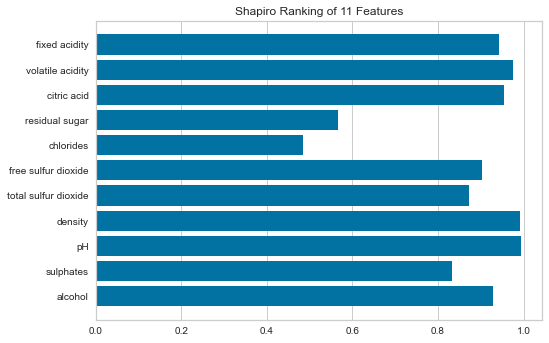

<AxesSubplot:title={'center':'Shapiro Ranking of 11 Features'}>

In [15]:
visualizer.fit(X,y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

In [16]:
visualizer2 = Rank2D(algorithm='pearson')

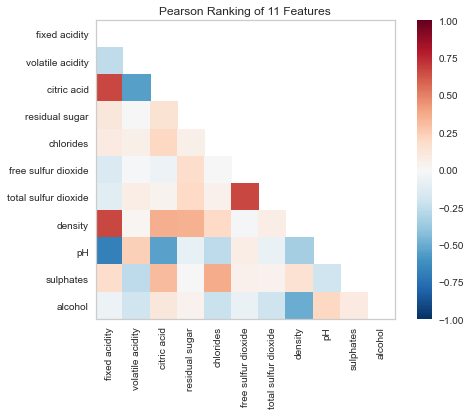

<AxesSubplot:title={'center':'Pearson Ranking of 11 Features'}>

In [17]:
visualizer2.fit(X,y)           # Fit the data to the visualizer
visualizer2.transform(X)        # Transform the data
visualizer2.show()              # Finalize and render the figure

## Testing with best param and best features

In [18]:
# using 5 parameters we have determined may result with better results:
X2 = red_wines.drop(["quality",'residual sugar', 'chlorides', 'target'], axis=1)
y2 = red_wines.target

In [19]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, random_state=42)

In [20]:
X_scaler2 = StandardScaler().fit(X_train2)
X_train_scaled2 = X_scaler2.transform(X_train2)
X_test_scaled2 = X_scaler2.transform(X_test2)

In [21]:
mlp2 = MLPClassifier(activation= 'relu', hidden_layer_sizes= (100, 2), learning_rate='constant')

mlp2.fit(X_train_scaled2, y_train2)

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(hidden_layer_sizes=(100, 2))

In [23]:
print(f"Training Data Score: {mlp2.score(X_train_scaled2, y_train2)}")
print(f"Testing Data Score: {mlp2.score(X_test_scaled2, y_test2)}")

Training Data Score: 0.8348623853211009
Testing Data Score: 0.76


In [25]:
predictions2 = mlp2.predict(X_test_scaled2)
print(classification_report(y_test2, predictions2))

              precision    recall  f1-score   support

           0       0.72      0.75      0.74       178
           1       0.79      0.77      0.78       222

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.76      0.76      0.76       400



In [26]:
mlp2 = MLPClassifier(activation= 'relu', hidden_layer_sizes= (100, 2), learning_rate='constant')
parameters = {
    'hidden_layer_sizes': [(10,2), (50,2), (100,2)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

cv2 = GridSearchCV(mlp, parameters, cv=5)
cv2.fit(X_train_scaled2, y_train2)

print_results(cv2)

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and th

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and th

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and th

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and th

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and th

BEST PARAMS: {'activation': 'relu', 'hidden_layer_sizes': (50, 2), 'learning_rate': 'adaptive'}

0.757 (+/-0.098) for {'activation': 'relu', 'hidden_layer_sizes': (10, 2), 'learning_rate': 'constant'}
0.751 (+/-0.11) for {'activation': 'relu', 'hidden_layer_sizes': (10, 2), 'learning_rate': 'invscaling'}
0.715 (+/-0.197) for {'activation': 'relu', 'hidden_layer_sizes': (10, 2), 'learning_rate': 'adaptive'}
0.758 (+/-0.076) for {'activation': 'relu', 'hidden_layer_sizes': (50, 2), 'learning_rate': 'constant'}
0.717 (+/-0.204) for {'activation': 'relu', 'hidden_layer_sizes': (50, 2), 'learning_rate': 'invscaling'}
0.763 (+/-0.099) for {'activation': 'relu', 'hidden_layer_sizes': (50, 2), 'learning_rate': 'adaptive'}
0.759 (+/-0.075) for {'activation': 'relu', 'hidden_layer_sizes': (100, 2), 'learning_rate': 'constant'}
0.7 (+/-0.244) for {'activation': 'relu', 'hidden_layer_sizes': (100, 2), 'learning_rate': 'invscaling'}
0.703 (+/-0.178) for {'activation': 'relu', 'hidden_layer_sizes': 

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [27]:
cv2.best_estimator_

MLPClassifier(hidden_layer_sizes=(50, 2), learning_rate='adaptive')

In [28]:
predictions2 = cv2.predict(X_test_scaled2)
print(classification_report(y_test2, predictions2))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       178
           1       0.79      0.82      0.80       222

    accuracy                           0.78       400
   macro avg       0.78      0.77      0.77       400
weighted avg       0.78      0.78      0.78       400



In [29]:
print(f"Training Data Score: {cv2.score(X_train_scaled2, y_train2)}")
print(f"Testing Data Score: {cv2.score(X_test_scaled2, y_test2)}")

Training Data Score: 0.8123436196830692
Testing Data Score: 0.7775


In [30]:
# using 5 parameters we have determined may result with better results:
X3 = red_wines.drop(["quality",'residual sugar', 'chlorides', 'target'], axis=1)
y3 = red_wines.target

In [31]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3, random_state=42)

In [32]:
X_scaler3 = StandardScaler().fit(X_train3)
X_train_scaled3 = X_scaler3.transform(X_train3)
X_test_scaled3 = X_scaler3.transform(X_test3)

In [33]:
mlp3 = MLPClassifier(activation = 'relu', hidden_layer_sizes= (100, 2), learning_rate='invscaling')

mlp3.fit(X_train_scaled3, y_train3)

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(hidden_layer_sizes=(100, 2), learning_rate='invscaling')

In [34]:
print(f"Training Data Score: {mlp3.score(X_train_scaled3, y_train3)}")
print(f"Testing Data Score: {mlp3.score(X_test_scaled3, y_test3)}")

Training Data Score: 0.8215179316096747
Testing Data Score: 0.7325


In [35]:
predictions3 = mlp3.predict(X_test_scaled3)
print(classification_report(y_test3, predictions3))

              precision    recall  f1-score   support

           0       0.68      0.75      0.71       178
           1       0.78      0.72      0.75       222

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.74      0.73      0.73       400



In [36]:
import joblib

In [37]:
filename = 'MLP_Red.sav'
joblib.dump(cv2, filename)

['MLP_Red.sav']

In [38]:
loaded_model= joblib.load(filename)

result=loaded_model.score(X_test_scaled2, y_test2)

print(result)

0.7775
